# 🤖 AI, CA5, Machine Learning 📚  

* **Name** : Darya 🖊  
* **Last Name** : Ansaripour 📝  
* **SID** : 610300022 🆔

In [2]:
import nltk
nltk.download("wordnet")
nltk.download("punkt_tab")
nltk.download("stopwords")



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, homogeneity_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [6]:
df = pd.read_csv("sample_data/dataset.csv")

### 🧹 Data Preprocessing  

In [7]:
# Remove unwanted characters
df['document'] = df['document'].str.replace(r'\s+', ' ', regex=True).str.strip()
df['document'] = df['document'].str.replace(r'[^\w\s]', '', regex=True)

# Convert characters to lowercase
df['document'] = df['document'].str.lower()

# Tokenize texts
df['tokens'] = df['document'].apply(word_tokenize)

# Remove stop words
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])



In [8]:
# Stemming (running -> run)
stemmer = PorterStemmer()
df['tokens'] = df['tokens'].apply(lambda x: [stemmer.stem(word) for word in x])

In [9]:
# Lemmetization (better -> good)
lemmatizer = WordNetLemmatizer()
df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [10]:
df['processed_text'] = df['tokens'].apply(lambda x: ' '.join(x))

## Q1.
### 1. Lemmatization
- **Definition:** Converts a word to its canonical (dictionary) form, called the **lemma**.
- **Examples:**
  - "running" → "run"
  - "better" → "good" (if identified as an adjective)
- **Advantages:**
  - Produces meaningful root words.
  - Maintains linguistic accuracy.
- **Disadvantages:**
  - Slower than stemming since it requires linguistic analysis.

---

### 2. Stemming
- **Definition:** Reduces a word to its base form (stem) by chopping off prefixes or suffixes without considering linguistic rules.
- **Examples:**
  - "running" → "run"
  - "better" → "better" (unchanged because no rules apply)
  - "studies" → "studi"
- **Advantages:**
  - Fast and simple.
- **Disadvantages:**
  - May generate words that aren't meaningful (e.g., "studi" instead of "study").

---

## Q2.
 Preprocessing text data is a crucial step in preparing raw text for machine learning and NLP tasks. It reduces noise, normalizes text, and enhances model performance by eliminating irrelevant information (e.g., punctuation, stop words) and standardizing formats (e.g., lowercase conversion, stemming, or lemmatization). Preprocessing also improves computational efficiency by reducing vocabulary size and dimensionality, making it easier for models to identify meaningful patterns. By transforming unstructured text into a clean and structured format, preprocessing ensures more accurate and reliable results in text-based applications.


## Q3.
Extracting features from text is essential for converting unstructured, human-readable text into a structured numerical format that machine learning models can understand and process. Text data, in its raw form, is inherently complex and lacks the numerical representation required for computational analysis. Feature extraction techniques, such as TF-IDF, word embeddings (e.g., Word2Vec or Transformer-based embeddings), or bag-of-words, capture the semantic and syntactic information from text, enabling models to identify patterns and relationships. This process helps bridge the gap between unstructured text and structured data, improving model performance in tasks like classification, clustering, and sentiment analysis.


### 🌿 Clustering

In [11]:
# Extract feature vector
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
df['embeddings'] = df['processed_text'].apply(lambda x: model.encode(x))
feature_matrix = np.vstack(df['embeddings'].values)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

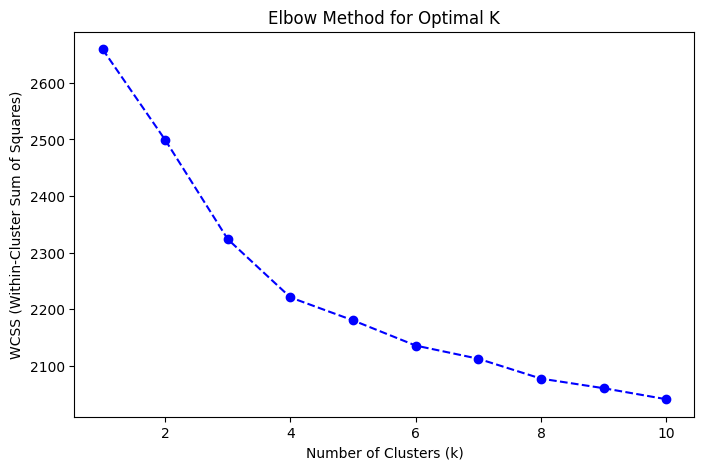

In [95]:
# KMeans
wcss = []
k_values = range(1, 11)

# Compute WCSS for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(feature_matrix)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [96]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(feature_matrix)

df['kmeans_cluster'] = kmeans_labels

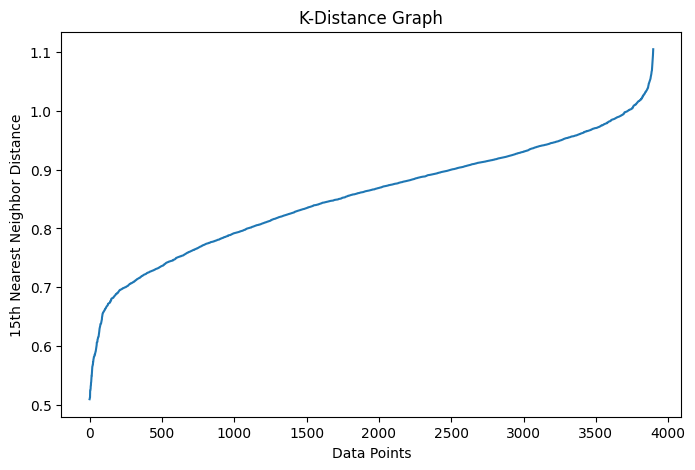

In [97]:
from sklearn.neighbors import NearestNeighbors

# Fit nearest neighbors model
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(feature_matrix)
distances, indices = neighbors.kneighbors(feature_matrix)

distances = np.sort(distances[:, 15])  # 15th neighbor distance
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title('K-Distance Graph')
plt.xlabel('Data Points')
plt.ylabel('15th Nearest Neighbor Distance')
plt.show()


In [98]:
# DBSCAN
dbscan = DBSCAN(eps=0.71, min_samples=15)
dbscan_labels = dbscan.fit_predict(feature_matrix)

df['dbscan_cluster'] = dbscan_labels

In [99]:
# Hierarchical
n_clusters = 4

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
hierarchical_labels = agg_clustering.fit_predict(feature_matrix)

df['hierarchical_cluster'] = hierarchical_labels

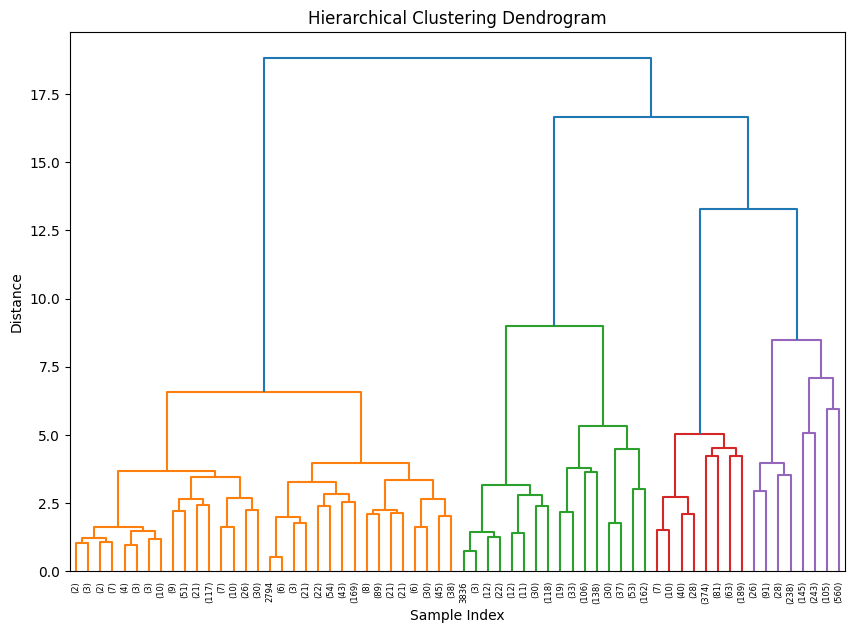

In [100]:
# Compute the linkage matrix for dendrogram
linkage_matrix = linkage(feature_matrix, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


## Q4.
**Supervised learning** involves training a model on labeled data, where the input-output pairs are provided, enabling the model to predict outcomes for unseen data (e.g., classification, regression). In contrast, **unsupervised learning** works with unlabeled data, aiming to uncover hidden patterns or groupings within the dataset (e.g., clustering, dimensionality reduction). While supervised learning relies on ground truth for guidance, unsupervised learning focuses on exploring the structure and relationships within the data itself.


## Q5.
Feature vectors are used to represent data in a structured, numerical format that machine learning models can process. They encode the essential characteristics or properties of the data (e.g., text, images, or audio) into a fixed-size vector, capturing relevant information while discarding noise. By using feature vectors, complex and unstructured data becomes manageable and interpretable for algorithms, enabling tasks like pattern recognition, clustering, and classification. They act as a bridge between raw data and the mathematical operations performed by models.


## Q6.
Sentence Transformers are a type of model designed to generate dense vector representations for sentences, enabling tasks like semantic search, clustering, and classification. The **all-MiniLM-L6-v2** model is a lightweight version of Sentence Transformers, optimized for speed and efficiency. It uses a 6-layer Transformer architecture and provides high-quality sentence embeddings while maintaining a small model size. This makes it well-suited for applications where computational resources are limited or low-latency inference is required.


## Q7.
### DBSCAN
**Description:** Density-Based Spatial Clustering of Applications with Noise (DBSCAN) identifies clusters as dense regions of points separated by sparse regions. It does not require specifying the number of clusters in advance.  
**Pros:** Handles noise, identifies clusters of arbitrary shape, and doesn’t require $ k $.  
**Cons:** Sensitive to parameters (`eps` and `min_samples`), struggles with varying densities and high-dimensional data.

### K-Means
**Description:** K-Means partitions data into $k$ clusters by minimizing the variance within clusters. It requires the number of clusters ($k$) to be specified.  
**Pros:** Simple, fast, and efficient for large datasets.  
**Cons:** Assumes spherical clusters, sensitive to initialization and outliers, and requires $ k$ in advance.

### Hierarchical Clustering
**Description:** Builds a tree-like structure (dendrogram) by iteratively merging or splitting clusters based on distance metrics.  
**Pros:** Doesn’t require $k$, provides a hierarchy of clusters, and works well for small datasets.  
**Cons:** Computationally expensive for large datasets and sensitive to the choice of linkage method and distance metric.


## Q8.
The elbow method is used in K-Means to determine the optimal number of clusters $k$. It involves plotting the **Within-Cluster Sum of Squares (WCSS)** or inertia against different values of $k$. As $k$ increases, WCSS decreases since more clusters reduce variance within each cluster. The "elbow" point on the graph, where the rate of decrease slows significantly, indicates the optimal
$k$, balancing compactness and simplicity of clustering.


## Q9.
**K-Means** is generally faster and more scalable. However, it assumes that clusters are of similar size and shape, which may not always hold true. **DBSCAN**, on the other hand, is better at handling noise and finding arbitrarily shaped clusters, but here it almost consider each text as noise!. **Hierarchical clustering** provides a flexible, interpretable structure and doesn’t require specifying the number of clusters in advance, but it’s computationally expensive and may not scale well to large datasets.


### 📉 Dimension Reduction

In [101]:
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(feature_matrix)

reduced_df = pd.DataFrame(reduced_features, columns=['PCA1', 'PCA2'])

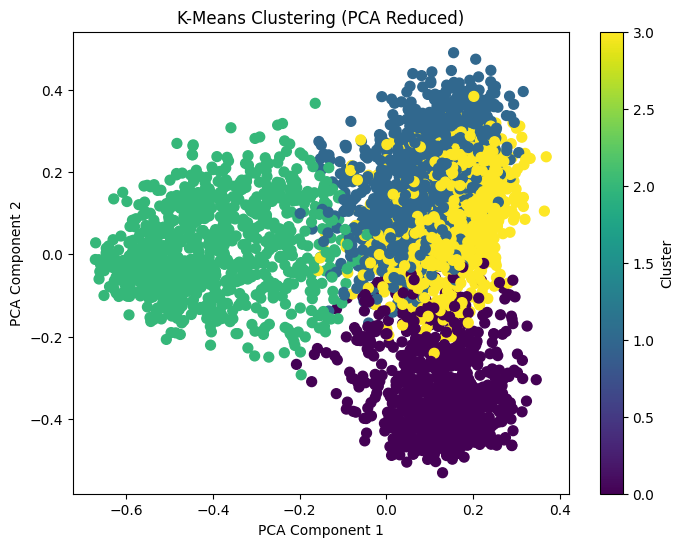

In [102]:
# Plot K-Means Clusters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_df['PCA1'], reduced_df['PCA2'], c=kmeans_labels, cmap='viridis', s=50)
plt.title('K-Means Clustering (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

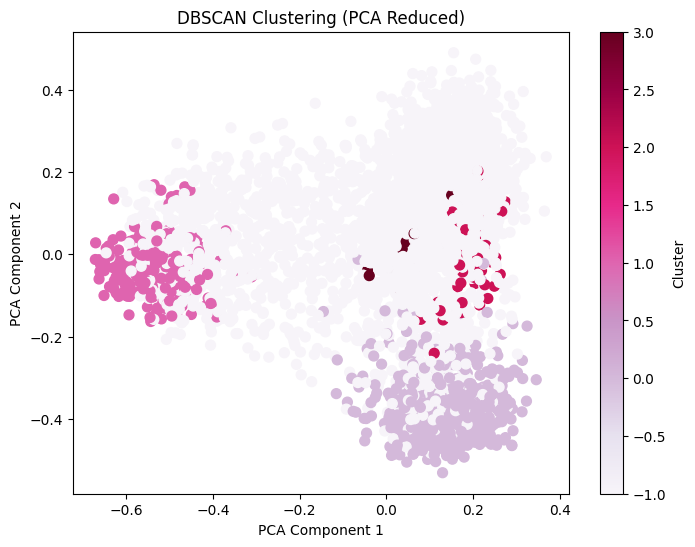

In [103]:
# Plot DBSCAN Clusters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_df['PCA1'], reduced_df['PCA2'], c=dbscan_labels, cmap='PuRd', s=50)
plt.title('DBSCAN Clustering (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

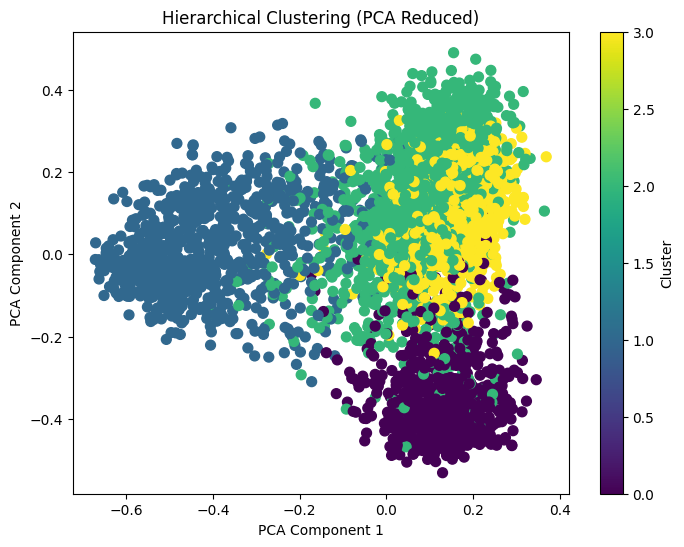

In [104]:
# Plot Hierarchical Clustering
plt.figure(figsize=(8, 6))
plt.scatter(reduced_df['PCA1'], reduced_df['PCA2'], c=hierarchical_labels, cmap='viridis', s=50)
plt.title('Hierarchical Clustering (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

## Q10.
**Principal Component Analysis** is a dimensionality reduction technique that transforms data into a set of orthogonal (uncorrelated) axes, called **principal components**, which capture the most significant variance in the data. The goal is to reduce the number of variables while retaining as much information as possible.

### How it works:
1. **Standardize the data** (if necessary) to ensure each feature has equal importance.
2. **Compute the covariance matrix** to understand how variables relate to each other.
3. **Find the eigenvalues and eigenvectors** of the covariance matrix. Eigenvectors represent the directions of maximum variance, and eigenvalues indicate their magnitude.
4. **Sort the eigenvectors** by eigenvalues in descending order to identify the most important components.
5. **Select the top principal components** (based on the desired level of variance to retain) and project the data onto these components.

The result is a reduced dataset with fewer dimensions but still preserving the majority of the data's variance.


### ✔️ Evaluation

In [107]:
from sklearn.metrics import silhouette_score, homogeneity_score

# Homogeneity scores are NOT correct, since we have no true labels!


# Ensure labels for DBSCAN are valid (ignore noise points labeled as -1)
valid_dbscan_indices = dbscan_labels != -1
evaluation_results = {}

# K-Means Evaluation
evaluation_results['K-Means'] = {
    'Silhouette Score': silhouette_score(feature_matrix, kmeans_labels),
    'Homogeneity Score': homogeneity_score(df['hierarchical_cluster'], kmeans_labels)
}

# DBSCAN Evaluation
if len(set(dbscan_labels[valid_dbscan_indices])) > 1:  # At least two clusters are required for valid silhouette score
    evaluation_results['DBSCAN'] = {
        'Silhouette Score': silhouette_score(feature_matrix[valid_dbscan_indices], dbscan_labels[valid_dbscan_indices]),
        'Homogeneity Score': homogeneity_score(df['hierarchical_cluster'][valid_dbscan_indices], dbscan_labels[valid_dbscan_indices])
    }
else:
    evaluation_results['DBSCAN'] = {
        'Silhouette Score': None,  # Not applicable
        'Homogeneity Score': None  # Not applicable
    }

# Hierarchical Clustering Evaluation
evaluation_results['Hierarchical'] = {
    'Silhouette Score': silhouette_score(feature_matrix, hierarchical_labels),
    'Homogeneity Score': homogeneity_score(df['hierarchical_cluster'], hierarchical_labels)
}

# Print Results
for method, scores in evaluation_results.items():
    print(f"\n{method} Clustering Evaluation:")
    for metric, value in scores.items():
        print(f"  {metric}: {value}")



K-Means Clustering Evaluation:
  Silhouette Score: 0.09257470071315765
  Homogeneity Score: 0.7186140563510207

DBSCAN Clustering Evaluation:
  Silhouette Score: 0.17599771916866302
  Homogeneity Score: 0.9232797053716831

Hierarchical Clustering Evaluation:
  Silhouette Score: 0.08238037675619125
  Homogeneity Score: 1.0


## Q11.
### Silhouette Score
The **Silhouette Score** measures how well-separated the clusters are. It combines the concepts of **cohesion** (how close data points within a cluster are) and **separation** (how distinct the clusters are). The score ranges from -1 to 1:
- **1**: Well-clustered and distinct.
- **0**: Clusters are overlapping or at the decision boundary.
- **-1**: Data points are misclassified.

A higher silhouette score indicates better-defined clusters.

### Homogeneity Score
The **Homogeneity Score** evaluates how well the data points in a cluster belong to a single class or category. It ranges from 0 to 1:
- **1**: All data points in a cluster belong to the same true class.
- **0**: Clusters contain data points from multiple classes.

A higher homogeneity score means the clustering is more consistent with the true class labels.


In [106]:
# Function to print representative samples from each cluster
def print_cluster_samples(df, cluster_column, text_column, n_samples=3):
    unique_clusters = df[cluster_column].unique()
    print(f"Clusters Found: {unique_clusters}\n")

    for cluster in unique_clusters:
        print(f"Cluster {cluster}:")
        cluster_texts = df[df[cluster_column] == cluster][text_column]
        # Sample n_samples or fewer if the cluster has less
        sample_texts = cluster_texts.sample(n=min(n_samples, len(cluster_texts)), random_state=42)
        for i, text in enumerate(sample_texts, 1):
            print(f"  {i}. {text}")
        print("\n")

# Example usage for K-Means
print("K-Means Clustering:")
print_cluster_samples(df, cluster_column='kmeans_cluster', text_column='document')

# Example usage for DBSCAN
print("DBSCAN Clustering:")
print_cluster_samples(df, cluster_column='dbscan_cluster', text_column='document')

# Example usage for Hierarchical Clustering
print("Hierarchical Clustering:")
print_cluster_samples(df, cluster_column='hierarchical_cluster', text_column='document')


K-Means Clustering:
Clusters Found: [0 3 1 2]

Cluster 0:
  1. from nieporntphoenixprincetonedu david marc nieporent subject re white and black  racism was about the phillies organization princeton university lines 55 originator newsnimaster nntppostinghost phoenixprincetonedu in article 294364010310p00421psilinkcom dennis g parslow p00421psilinkcom writes from dan campbell dan_cjhunixhcfjhuedu in article 1993apr110256361ulkyvxlouisvilleedu pjtier01ulkyvxlouisvilleedu writes in article apr10093333199328038pilotnjinnet gajarskypilotnjinnet bob gajarsky  hobokenite writes  heres the hard working black players  none  heres the lazy white players  mcreynolds now that time has passed what would the posts be like if rickey were driving his boat drunk killing himself and one of his teammates what would people say if bonds drunk out of his skull smashed his car into a tree disabling himself  say willie mcgee for the season i can tell you they would be considered spoiled lazy say it niggers  th